# Install dependencies

In [ ]:
!pip install stable-baselines3 gym-anytrading gym
!pip install finta
!pip install quantstats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 KB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.0/172.0 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gym: filename=gym-0.21.0-py3-none-any.whl size=1616826 sha256=dac9664bd6b1b89f85f59d1190e2f831fc1cae75174cd0cafaa3c0e41c31a481
  Stored in directory: /root/.cache/pip/wheels/27/6d/b3/a3a6e10704795c9b9000f1ab2dc480dfe7bed42f5972806e73
Successfully built gym
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 6.0.0
    Uninstalling importlib-metadata-6.0.0:
      Successfully uninstalled importlib-metadata-6.0.0
  Attempting uninstall: gym
    Found existing installation: gym 0.25.2
    Uninstalling gym-0.25.2:
      Successfully uninstalled gym-0.25.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 51.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.

In [ ]:
# Gym stuff
import gym
import gym_anytrading
from gym_anytrading.envs import StocksEnv

# Stable baselines - rl stuff
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.callbacks import EvalCallback, StopTrainingOnRewardThreshold
from stable_baselines3 import A2C

#Quant Finance
from finta import TA
import quantstats as qs

# Processing libraries
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
key = "08JMP5U1JKAJJ33E"

#Download 3 months of data (Alphavantage only provides 1 month per call)
month_1 = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=AAPL&interval=5min&slice=year1month1&apikey={key}&datatype=csv'
month_2 = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=AAPL&interval=5min&slice=year1month2&apikey={key}&datatype=csv'
month_3 = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=AAPL&interval=5min&slice=year1month3&apikey={key}&datatype=csv'

#Grab the Data as CSV
csv_1 = pd.read_csv(month_1)
csv_2 = pd.read_csv(month_2)
csv_3 = pd.read_csv(month_3)

#Put it into a DataFrame
data_1 = pd.DataFrame(csv_1)
data_2 = pd.DataFrame(csv_2)
data_3 = pd.DataFrame(csv_3)

#Append the three months into one Dataframe
data = data_1.append([data_2, data_3])

data.head(3)

,time,open,high,low,close,volume
0,2023-02-08 20:00:00,152.42,152.50,152.40,152.40,6208
1,2023-02-08 19:55:00,152.48,152.48,152.40,152.40,1874
2,2023-02-08 19:50:00,152.44,152.48,152.44,152.48,1911


In [ ]:
#Change the Time to proper type and set as index
data['time'] = pd.to_datetime(data['time'])
data.set_index('time', inplace=True)
data.head()

,open,high,low,close,volume
time,,,,,
2023-02-08 20:00:00,152.42,152.50,152.40,152.40,6208
2023-02-08 19:55:00,152.48,152.48,152.40,152.40,1874
2023-02-08 19:50:00,152.44,152.48,152.44,152.48,1911
2023-02-08 19:45:00,152.43,152.44,152.42,152.42,582
2023-02-08 19:40:00,152.50,152.50,152.36,152.42,3839


In [ ]:
#Set the values so the earliest time is first and the latest is last in the dataframe
data.sort_values('time', ascending=True, inplace=True)
data.head()

,open,high,low,close,volume
time,,,,,
2022-11-11 04:05:00,147.873056,148.552197,147.673309,148.102766,29215
2022-11-11 04:10:00,148.052829,148.052829,147.843094,148.002892,12690
2022-11-11 04:15:00,147.982917,148.102766,147.962942,147.992904,9093
2022-11-11 04:20:00,148.012879,148.012879,147.813132,147.913005,31118
2022-11-11 04:25:00,147.873056,147.883043,147.553460,147.833106,15458


In [ ]:
#Title the columns for gym formatting reasons
data = data.rename(columns = {'open': 'Open', 'high': 'High', 'low': 'Low', 'close': 'Close', 'volume': 'Volume'})

In [ ]:
data.shape

(11223, 5)

# Add Custom Indicators

In [ ]:
#Create columns for technical indicators & add them to the dataframe
data['RSI'] = TA.RSI(data,16)
data['SMA'] = TA.SMA(data)
data['OBV'] = TA.OBV(data)
data.fillna(0, inplace=True)

# Build Gym

In [ ]:
#Create a function to properly format data frame to be passed through environment
def signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:,'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low','Open','High','Volume','RSI','SMA','OBV',]].to_numpy()[start:end]
    return prices, signal_features

In [ ]:
data.head()


,Open,High,Low,Close,Volume,RSI,SMA,OBV
time,,,,,,,,
2022-11-11 04:05:00,147.873056,148.552197,147.673309,148.102766,29215,0.0,0.0,0.0
2022-11-11 04:10:00,148.052829,148.052829,147.843094,148.002892,12690,0.0,0.0,-12690.0
2022-11-11 04:15:00,147.982917,148.102766,147.962942,147.992904,9093,0.0,0.0,-21783.0
2022-11-11 04:20:00,148.012879,148.012879,147.813132,147.913005,31118,0.0,0.0,-52901.0
2022-11-11 04:25:00,147.873056,147.883043,147.553460,147.833106,15458,0.0,0.0,-68359.0


In [ ]:
#Replace default data process with custom function from above
class MyCustomEnv(StocksEnv):
    _process_data = signals
    
#Initialize an environment setting the window size and train data
env2 = MyCustomEnv(df=data, window_size=100, frame_bound=(100, 9000))

In [ ]:
#Create a Dummy Vector of our environment
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

# Train Agent

In [ ]:
# Create log dir to save path to store our callback and model
log_dir = "reinforcement_learning/tmp/"
save_path = os.path.join('reinforcement_learning','tmp')

In [ ]:
#Stop training when the model reaches a stable training threshold
stop_callback = StopTrainingOnRewardThreshold(reward_threshold=200, verbose=1)

#Check training & evaluate performance unitl threshold has been met
eval_callback = EvalCallback(env,
                            callback_on_new_best=stop_callback,
                            eval_freq=10000,
                            best_model_save_path=save_path,
                            verbose=1)

In [ ]:
#initialize our model and train
actor_critic = A2C('MlpPolicy', env, verbose=1) 
actor_critic.learn(total_timesteps=10000, callback=eval_callback)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 592      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.658   |
|    explained_variance | -10.5    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.112    |
|    value_loss         | 0.048    |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 583      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.485   |
|    explained_variance | -1.54    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.0302  |
|    value_loss      

/usr/local/lib/python3.8/dist-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Eval num_timesteps=9000, episode_reward=-8.82 +/- 0.00
Episode length: 8899.00 +/- 0.00
------------------------------------
| eval/                 |          |
|    mean_ep_length     | 8.9e+03  |
|    mean_reward        | -8.82    |
| time/                 |          |
|    total_timesteps    | 9000     |
| train/                |          |
|    entropy_loss       | -0.589   |
|    explained_variance | 0.388    |
|    learning_rate      | 0.0007   |
|    n_updates          | 1799     |
|    policy_loss        | -0.574   |
|    value_loss         | 1.1      |
------------------------------------
New best mean reward!
-----------------------------
| time/              |      |
|    fps             | 199  |
|    iterations      | 1800 |
|    time_elapsed    | 45   |
|    total_timesteps | 9000 |
-----------------------------
------------------------------------
| time/                 |          |
|    fps                | 205      |
|    iterations         | 1900     |
|    time_elap

In [ ]:
#PPO = PPO('MlpPolicy', env, verbose=1)
#PPO.learn(total_timesteps=1000000, callback=eval_callback)

#DQN = DQN('MlpPolicy', env, verbose=1)
#DQN.learn(total_timesteps=1000000, callback=eval_callback)

# Test

In [ ]:
#Load our trained model
model = A2C.load("reinforcement_learning/tmp/best_model.zip")

In [ ]:
#Create a new environment with validation data
env = MyCustomEnv(df=data, window_size=100, frame_bound=(8900,11243))
obs = env.reset()

In [ ]:
while True: 
    #obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 0.8065000000000282, 'total_profit': 0.0005549867057039625, 'position': 0}


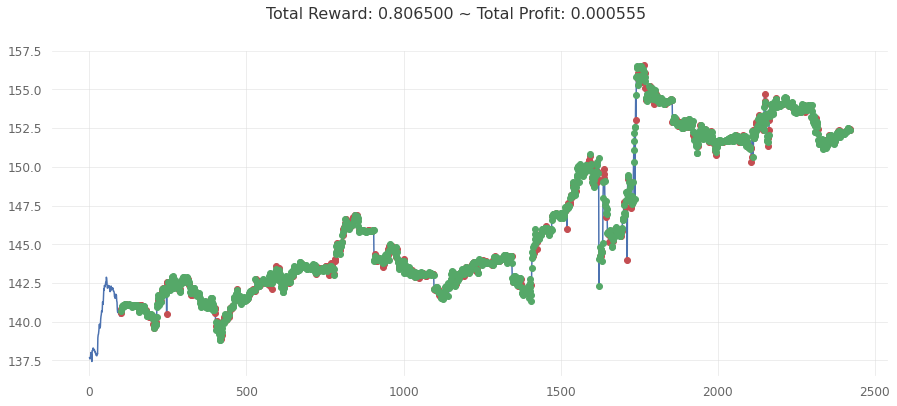

In [ ]:
#Plot the results
plt.figure(figsize=(15,6),facecolor='w')
plt.cla()
env.render_all()
plt.show()

# Quant Report

[Performance Metrics]



                           Strategy
-------------------------  ----------
Start Period               2023-01-23
End Period                 2023-02-08
Risk-Free Rate             0.0%
Time in Market             22.0%

Cumulative Return          -99.94%
CAGR﹪                     -100.0%

Sharpe                     -7.93
Prob. Sharpe Ratio         0.0%
Smart Sharpe               -6.15
Sortino                    -7.12
Smart Sortino              -5.52
Sortino/√2                 -5.03
Smart Sortino/√2           -3.91
Omega                      0.01

Max Drawdown               -99.94%
Longest DD Days            16
Volatility (ann.)          10.19%
Calmar                     -1.0
Skew                       -1.64
Kurtosis                   2.31

Expected Daily %           -0.32%
Expected Monthly %         -97.64%
Expected Yearly %          -99.94%
Kelly Criterion            -93.29%
Risk of Ruin               0.0%
Daily Value-at-Risk        -1.38%
Expected Shortfall (cVaR)  -1.38%

Max Consecutiv

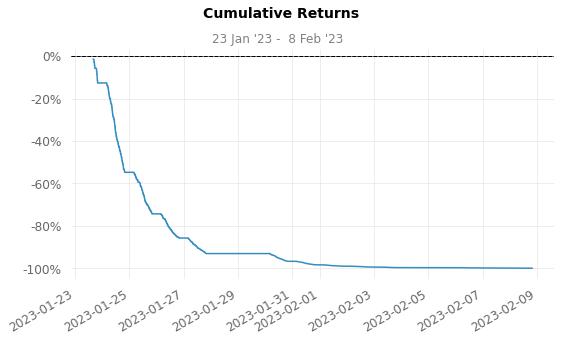

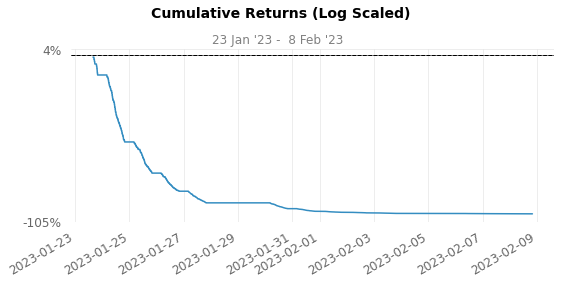

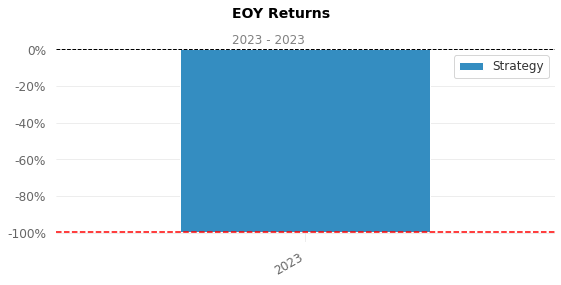

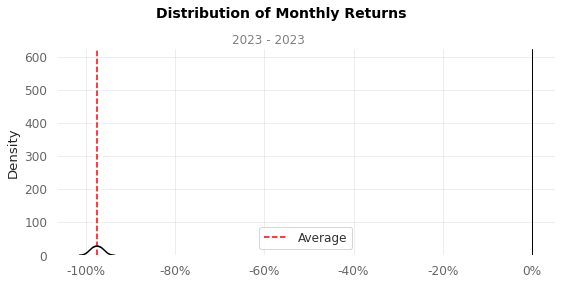

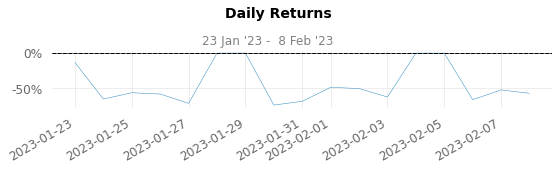

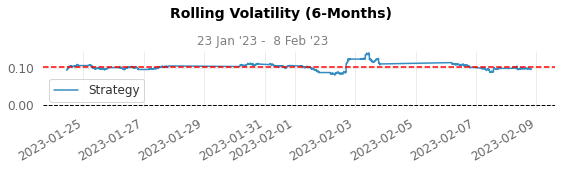

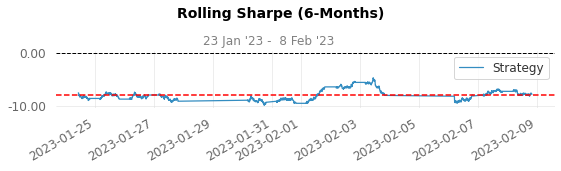

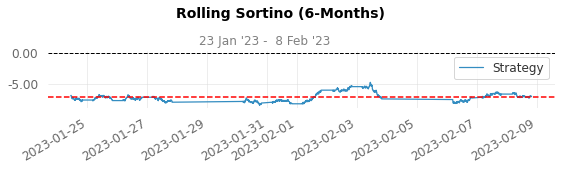

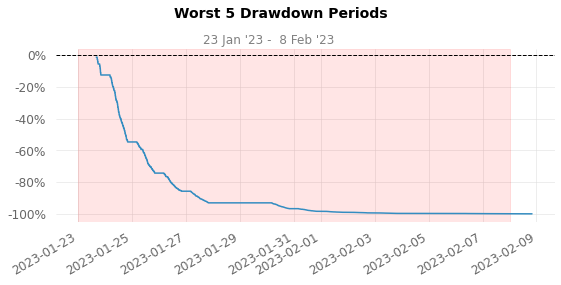

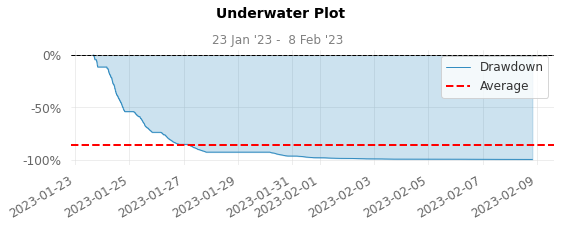

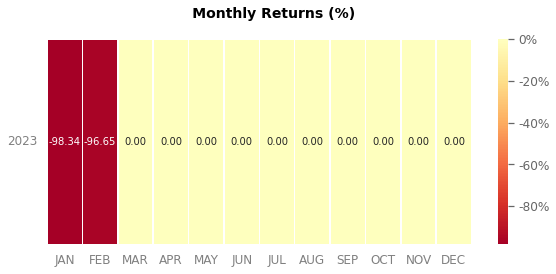

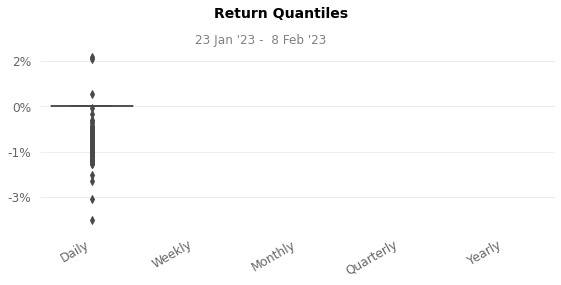

In [ ]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=data.index[8900+1:])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)